In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("../../Dataset/household_power_consumption/household_power_consumption.txt", sep=';', low_memory=False)

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.replace('?', np.NaN, inplace=True)

In [6]:
# Change type of features
df = df.astype({'Global_active_power':np.float64, 'Global_reactive_power':np.float64, 'Voltage':np.float64,
           'Global_intensity':np.float64, 'Sub_metering_1':np.float64, 'Sub_metering_2':np.float64})

In [7]:
df.Date = df.Date.astype(np.Datetime64)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19/12/2006' in DD/MM/YYYY format. Provide format or specif

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 142.5+ MB


In [9]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,2010-09-28,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,2010-09-28,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,2010-09-28,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,2010-09-28,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# We have many rows in the dataset therfore dropping rows with null values will not affect the dataset

df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

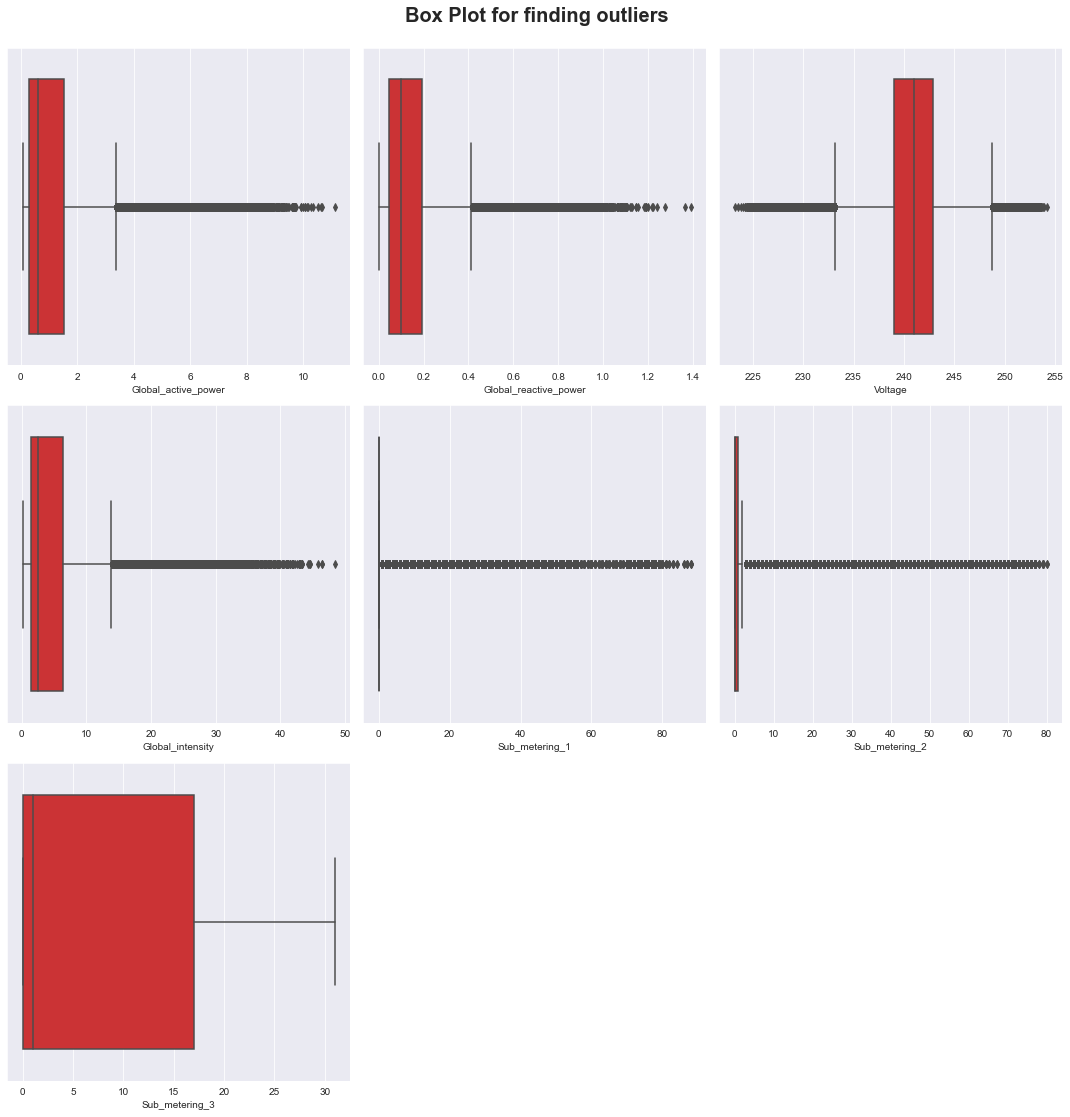

In [14]:
# boxplot to find out ouliers in the features    
rows = 5
cols = 3
fig = plt.figure(figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)

for i, col in enumerate(['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                        'Sub_metering_2', 'Sub_metering_3']):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x =col, data=df, palette="Set1")
fig.tight_layout()
plt.show()

In [15]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [16]:
def outlier_index_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    index1 = np.where(data > upr_bound)
    index2 = np.where(data < lwr_bound)
    return np.concatenate([index1[0], index2[0]])

In [17]:
len(outlier_index_iqr(df.Sub_metering_1))

169105

In [19]:
finalArray = np.zeros(0)
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                        'Sub_metering_2', 'Sub_metering_3']:
    finalArray = np.concatenate([finalArray, outlier_index_iqr(df[col])])

In [20]:
len(set(finalArray))

206292

In [21]:
trim_df = df.copy()

In [22]:
trim_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [23]:
trim_df = trim_df.loc[set(trim_df.index) - set(finalArray)]

C:\Users\hitesh wadhwani\AppData\Local\Temp\ipykernel_8104\3760296548.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  trim_df = trim_df.loc[set(trim_df.index) - set(finalArray)]


In [24]:
trim_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
37187,2007-11-01,13:11:00,0.294,0.142,240.75,1.4,0.0,0.0,0.0
37188,2007-11-01,13:12:00,0.288,0.142,241.08,1.4,0.0,0.0,0.0
37189,2007-11-01,13:13:00,0.290,0.144,241.31,1.4,0.0,0.0,0.0
37190,2007-11-01,13:14:00,0.290,0.148,242.22,1.4,0.0,0.0,0.0
37191,2007-11-01,13:15:00,0.290,0.148,242.16,1.4,0.0,0.0,0.0


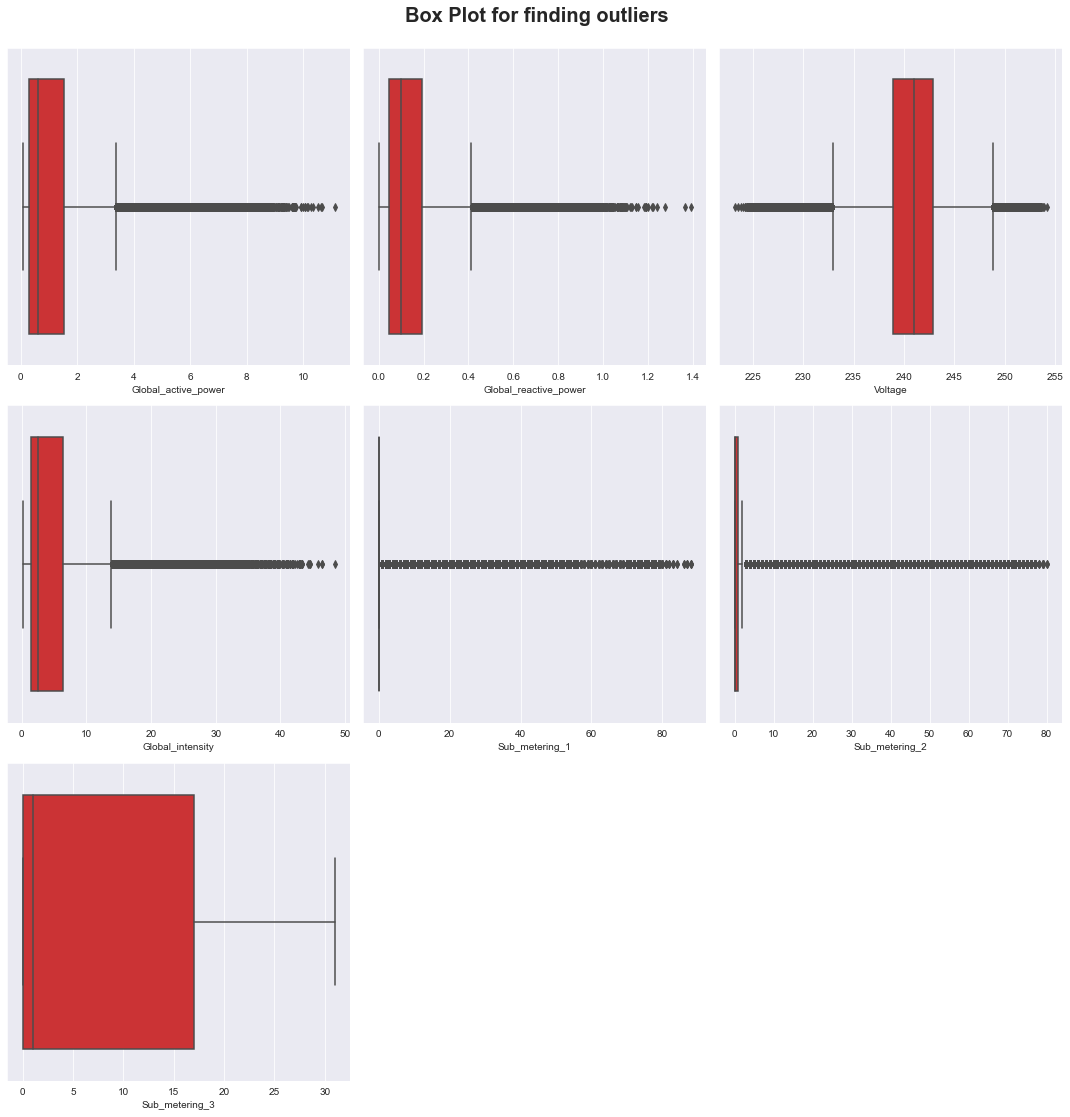

In [25]:
# boxplot after removing outliers
rows = 5
cols = 3
fig = plt.figure(figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)

for i, col in enumerate(['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                        'Sub_metering_2', 'Sub_metering_3']):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x =col, data=trim_df, palette="Set1")
fig.tight_layout()
plt.show()

### Train/test split

In [26]:
trim_df.reset_index(inplace=True)

In [27]:
trim_df.drop(['index', 'Date', 'Time'], axis=1, inplace=True)

In [28]:
trim_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.294,0.142,240.75,1.4,0.0,0.0,0.0
1,0.288,0.142,241.08,1.4,0.0,0.0,0.0
2,0.290,0.144,241.31,1.4,0.0,0.0,0.0
3,0.290,0.148,242.22,1.4,0.0,0.0,0.0
4,0.290,0.148,242.16,1.4,0.0,0.0,0.0


In [29]:
trim_df['Target'] = trim_df.Sub_metering_1 + trim_df.Sub_metering_2 + trim_df.Sub_metering_3

In [30]:
trim_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Target
0,0.294,0.142,240.75,1.4,0.0,0.0,0.0,0.0
1,0.288,0.142,241.08,1.4,0.0,0.0,0.0,0.0
2,0.290,0.144,241.31,1.4,0.0,0.0,0.0,0.0
3,0.290,0.148,242.22,1.4,0.0,0.0,0.0,0.0
4,0.290,0.148,242.16,1.4,0.0,0.0,0.0,0.0


In [31]:
trim_df.duplicated().sum()

126794

In [32]:
trim_df.drop_duplicates(inplace=True)

In [33]:
trim_df.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)

In [34]:
trim_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Target
0,0.294,0.142,240.75,1.4,0.0
1,0.288,0.142,241.08,1.4,0.0
2,0.290,0.144,241.31,1.4,0.0
3,0.290,0.148,242.22,1.4,0.0
4,0.290,0.148,242.16,1.4,0.0


In [35]:
X = trim_df.drop('Target', axis=1)
y = trim_df['Target']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=32)

In [37]:
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test.shape[0])

X_train row number : 1158204
X_test row number : 570459
y_train row number : 1158204
y_test row number : 570459


### Model Building

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
lr_model = LinearRegression()
Ridge_model = Ridge()
Lasso_model = Lasso()
en_model = ElasticNet()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

classifier = [lr_model, Ridge_model, Lasso_model, en_model, rf_model]
for c in classifier:
    pipe = Pipeline(steps=[('regressor', c)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print(f"Algorithm {c}")
    print('MSE--->', mean_squared_error(y_test, y_pred))
    print('MAE--->', mean_absolute_error(y_test, y_pred))
    print('RMSE-->', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r sqaure--->', r2_score(y_test, y_pred))
    print('adj r square-->', 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1))
    print("\n")

Algorithm LinearRegression()
MSE---> 48.49060242997773
MAE---> 4.468353920547022
RMSE--> 6.9635193996985265
r sqaure---> 0.7222338497399519
adj r square--> 0.7222332070074964


Algorithm Ridge()
MSE---> 48.49059231780669
MAE---> 4.4683617268188796
RMSE--> 6.963518673616571
r sqaure---> 0.7222339076649659
adj r square--> 0.7222332649326444


Algorithm Lasso()
MSE---> 49.831675967034776
MAE---> 4.615240500441531
RMSE--> 7.059155471232715
r sqaure---> 0.7145518492091919
adj r square--> 0.7145511887010965


Algorithm ElasticNet()
MSE---> 49.923323712653755
MAE---> 4.63897759780102
RMSE--> 7.0656438993664095
r sqaure---> 0.7140268682808284
adj r square--> 0.7140262065579619


Algorithm RandomForestRegressor()
MSE---> 37.12906924843601
MAE---> 3.0726155377664632
RMSE--> 6.093362720898536
r sqaure---> 0.7873155186560229
adj r square--> 0.7873150265182343


